# Music Genre Clustering using Gaussian Mixture Models

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('data3000.csv')
features = data.columns.difference(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'])

data_features = data[features].apply(pd.to_numeric, errors='coerce')
data_features = data_features.dropna(axis=1) 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

In [93]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm_labels = gmm.fit_predict(data_pca_df)

data_pca_df['Cluster'] = gmm_labels

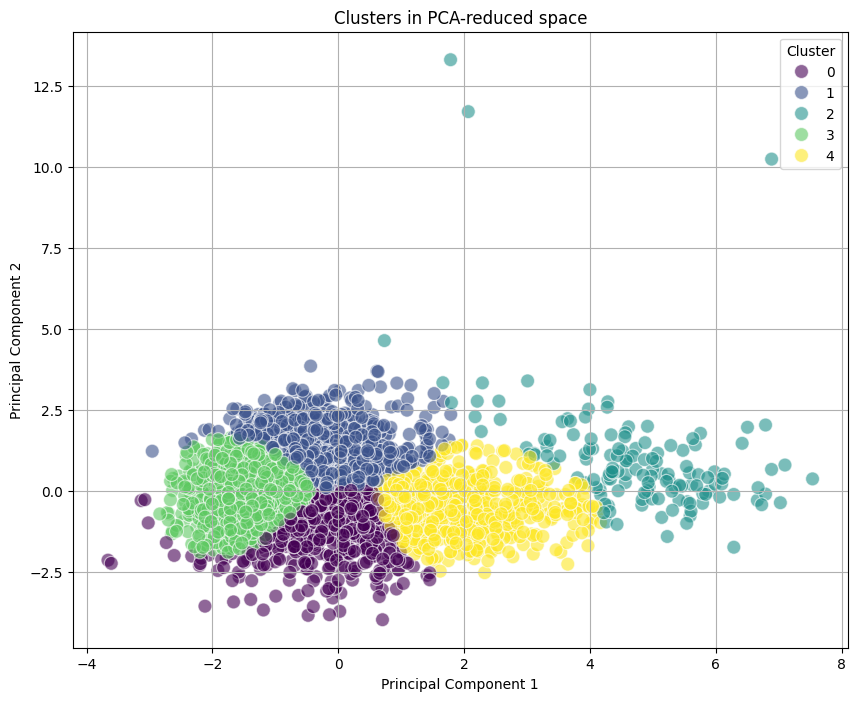

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=data_pca_df, s=100, alpha=0.6)
plt.title('Clusters in PCA-reduced space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import silhouette_score

# Quantitative metric: Silhouette Score
silhouette = silhouette_score(data_pca_df[['PC1', 'PC2']], gmm_labels)
print("Silhouette Score: {:.2f}".format(silhouette))

Silhouette Score: 0.33


## Interpretation
Based on the clustering results and the Silhouette Score, we discuss the effectiveness of potential music genre groupings inferred from the GMM clustering.
Silhoutte Score of 0.33 indicates very fair clustering, ideally we would fine tune to +0.5 but extremely difficult given size of dataset. Howeever, the silhoutte score does not give the whole story as we need to evaluate how far the clustering deviates from the actual ground truth of the musical genres. In order to this, we need to check whether the clustering is meaningful by fine tuning our data set to group sub genres into larger genre sets and evaluate quantiative metrics relating to clustering precision.

In [96]:
# Simplify genres to a smaller set for clearer analysis
genre_mapping = {
    'children': 'children', 
    'deep-house': 'edm', 
    'minimal-techno': 'edm', 
    'songwriter': 'other', 
    'sleep': 'other', 
    'hardcore': 'other', 
    'grindcore': 'other', 
    'rock': 'rock', 
    'alternative': 'rock', 
    'electronic': 'edm', 
    'grunge': 'rock', 
    'sad': 'other', 
    'sertanejo': 'other', 
    'french': 'other', 
    'world-music': 'world-music', 
    'reggae': 'reggae', 
    'death-metal': 'other', 
    'trip-hop': 'edm', 
    'rock-n-roll': 'rock', 
    'techno': 'edm', 
    'club': 'edm', 
    'british': 'other', 
    'malay': 'malay', 
    'party': 'other', 
    'rockabilly': 'rock', 
    'folk': 'other', 
    'comedy': 'other', 
    'spanish': 'other', 
    'samba': 'other', 
    'pagode': 'other', 
    'chicago-house': 'edm', 
    'emo': 'rock', 
    'dance': 'edm', 
    'funk': 'other', 
    'industrial': 'edm', 
    'iranian': 'other', 
    'drum-and-bass': 'edm', 
    'acoustic': 'other', 
    'bluegrass': 'other', 
    'singer-songwriter': 'other', 
    'edm': 'edm', 
    'metal': 'other', 
    'j-idol': 'j-idol', 
    'j-dance': 'other', 
    'show-tunes': 'other', 
    'chill': 'other', 
    'hard-rock': 'rock', 
    'alt-rock': 'rock', 
    'anime': 'other', 
    'r-n-b': 'other', 
    'soul': 'other', 
    'punk': 'rock', 
    'blues': 'other', 
    'dubstep': 'edm', 
    'guitar': 'other', 
    'study': 'other', 
    'hip-hop': 'other', 
    'country': 'other', 
    'latino': 'other', 
    'power-pop': 'other', 
    'brazil': 'other', 
    'turkish': 'other', 
    'pop-film': 'other', 
    'new-age': 'other', 
    'reggaeton': 'other', 
    'punk-rock': 'rock', 
    'kids': 'children', 
    'piano': 'other', 
    'afrobeat': 'afrobeat', 
    'happy': 'other', 
    'k-pop': 'k-pop', 
    'tango': 'other', 
    'forro': 'other', 
    'pop': 'other', 
    'progressive-house': 'edm', 
    'j-pop': 'other', 
    'ambient': 'other', 
    'gospel': 'other', 
    'metalcore': 'other', 
    'idm': 'edm', 
    'j-rock': 'other', 
    'jazz': 'other', 
    'goth': 'other', 
    'indie-pop': 'indie-pop', 
    'hardstyle': 'edm', 
    'indian': 'other', 
    'honky-tonk': 'other', 
    'disco': 'other', 
    'mandopop': 'other', 
    'mpb': 'other', 
    'detroit-techno': 'edm', 
    'house': 'edm', 
    'cantopop': 'other', 
    'classical': 'classical', 
    'psych-rock': 'rock', 
    'electro': 'edm', 
    'opera': 'other', 
    'groove': 'other', 
    'trance': 'edm', 
    'german': 'german', 
    'breakbeat': 'edm', 
    'romance': 'other', 
    'swedish': 'other', 
    'heavy-metal': 'other', 
    'latin': 'other', 
    'garage': 'edm', 
    'synth-pop': 'edm', 
    'salsa': 'other', 
    'disney': 'other', 
    'dub': 'other', 
    'ska': 'other', 
    'indie': 'indie-pop', 
    'dancehall': 'reggae', 
    'black-metal': 'other'
}

data['simplified_genre'] = data['track_genre'].map(genre_mapping)
data['simplified_genre'] = data['track_genre'].map(genre_mapping).fillna('Other')
print(data['simplified_genre'])

gmm = GaussianMixture(n_components=5, random_state=0)
data['cluster'] = gmm.fit_predict(data_pca)

# Compute Adjusted Rand Index to measure the similarity between true labels and clusters
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(data['simplified_genre'], data['cluster'])

0       children
1            edm
2            edm
3          other
4          other
          ...   
2995       other
2996         edm
2997       other
2998       other
2999       other
Name: simplified_genre, Length: 3000, dtype: object


0.014324142022408542

In [97]:
from scipy.stats import spearmanr

correlation, _ = spearmanr(gmm_labels, data['simplified_genre'].astype('category').cat.codes)
print(f"Spearman's rank correlation between GMM clusters and genres: {correlation:.2f}")

Spearman's rank correlation between GMM clusters and genres: 0.04


In [98]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

data['gmm_labels'] = gmm_labels
data.dropna(subset=['simplified_genre', 'gmm_labels'], inplace=True)

print(data['simplified_genre'].value_counts())
print(np.unique(gmm_labels))

try:
    correlation, _ = spearmanr(gmm_labels, data['simplified_genre'].astype('category').cat.codes)
    print(f"Spearman's rank correlation: {correlation:.2f}")
except Exception as e:
    print(f"Error computing Spearman's correlation: {e}")

try:
    ari_score = adjusted_rand_score(data['simplified_genre'], gmm_labels)
    nmi_score = normalized_mutual_info_score(data['simplified_genre'], gmm_labels)
    print(f"Adjusted Rand Index: {ari_score:.2f}")
    print(f"Normalized Mutual Information: {nmi_score:.2f}")
except Exception as e:
    print(f"Error computing clustering metrics: {e}")


other          1735
edm             571
rock            285
children         63
reggae           54
indie-pop        51
malay            36
world-music      35
afrobeat         35
j-idol           34
k-pop            34
classical        34
german           33
Name: simplified_genre, dtype: int64
[0 1 2 3 4]
Spearman's rank correlation: 0.04
Adjusted Rand Index: -0.00
Normalized Mutual Information: 0.07


## Conclusion & Discussion

The clustering metrics suggest that while the model was able to form clusters based on feature similarity, there is minimal correlation with the actual music genres, as indicated by low scores in Spearman's rank correlation, Adjusted Rand Index, and Normalized Mutual Information. This implies that the clustering might not meaningfully capture genre distinctions, potentially due to the diverse nature of genres and their overlap in musical features. Additionally, the data set's composition was challenging to work with, being highly skewed towards the 'other' category and having insufficient representation for top genres. To achieve more reliable and insightful results, a larger and more balanced dataset would be beneficial, enabling better-defined clusters that more accurately reflect genre distinctions.